# Notebook to generate Supp Figure 2A-B

In [1]:
## import statement

%matplotlib widget
from matplotlib import pyplot as plt
import seaborn
import scanpy
import pandas
from typing import Tuple, Any, List, Union
import numpy as np
import torch
import random
import os
from anndata import read_h5ad
from scanpy import pp
import pandas as pd
import umap
import scanpy as sc

# tissue_purifier import
import tissue_purifier as tp

In [2]:
from tissue_purifier.utils import *
from tissue_purifier.plots import *
from tissue_purifier.plots.plot_misc import *
from tissue_purifier.models.patch_analyzer import SpatialAutocorrelation, Composition
from tissue_purifier.data.dataset import MetadataCropperDataset

[neptune] [warning] NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.


In [3]:
## pytorch

torch.cuda.set_device(0)
torch.set_default_tensor_type(torch.FloatTensor)

/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025845868/work/torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


In [4]:
## Set working directory

import os
os.chdir("/home/skambha6/chenlab/tissue_purifier/TissueMosaic_Figures/Supp_Figure2/plots")

In [5]:
## path names

anndata_dest_folder='/home/skambha6/chenlab/tissue_purifier/data/testis_anndata_corrected_doubletmode_annotated/'

# Make a list of all the h5ad files in the annotated_anndata_dest_folder
fname_list = []
for f in os.listdir(anndata_dest_folder):
    if f.endswith('.h5ad'):
        fname_list.append(f)
print(fname_list)

['wt3_dm.h5ad', 'wt1_dm.h5ad', 'diabetes2_dm.h5ad', 'wt2_dm.h5ad', 'diabetes1_dm.h5ad', 'diabetes3_dm.h5ad']


In [6]:
# ## Input Model

# # all_ckpts = ["testis_dino_ckpt_val_sweep_gr_best.pt", "testis_simclr_ckpt_val_sweep_gr_best.pt", "barlow_testis_val_sweep_2.pt", "testis_vae_ckpt_best.pt"]
# # all_models = ["dino", "simclr", "barlow", "vae"]

# all_ckpts = ['dino_testis_no_local.pt']
# all_models = ["dino"]

# all_ckpts_dest = []
# for ckpt in all_ckpts:
#     ckpt_dest = os.path.join("/home/skambha6/chenlab/tissue_purifier/model_checkpoints/testis/", ckpt)
#     all_ckpts_dest.append(ckpt_dest)
    
# print(all_ckpts_dest)

### Generate patch representations for all models

In [8]:
# ## set seeds
# r_seed=t_seed=n_seed=100

# random.seed(r_seed)
# torch.manual_seed(t_seed)
# np.random.seed(n_seed)



In [9]:
# compute_regress_features = True

In [10]:
# ## Collect Sparse Images and features dict
# ## This saves the sparse images and anndatas following the datamodule from the last model 

# from tissue_purifier.data import AnndataFolderDM
# from tissue_purifier.models.ssl_models import *

# all_features_dict = {}

# for ckpt_path, model_name in zip(all_ckpts_dest, all_models):
    
#     print("----------")
#     print("Model --->", model_name, ckpt_path)
#     print("----------")
    
#     # load the model from checkpoint
#     if model_name == "barlow":
#         model = tp.models.ssl_models.Barlow.load_from_checkpoint(checkpoint_path=ckpt_path, strict=False)
#     elif model_name == "simclr":
#         model = tp.models.ssl_models.Simclr.load_from_checkpoint(checkpoint_path=ckpt_path, strict=False)
#     elif model_name == "dino":
#         model = tp.models.ssl_models.Dino.load_from_checkpoint(checkpoint_path=ckpt_path, strict=False)
#     elif model_name == "vae":
#         model = tp.models.ssl_models.Vae.load_from_checkpoint(checkpoint_path=ckpt_path, strict=False)
#     else:
#         raise Exception("Model name not recongnized {}".format(model_name))
        
#     # create the datamodule associated with the pretrained model
#     dm = tp.data.AnndataFolderDM(**model._hparams) 
    
#     # put the model on GPU if available
#     if torch.cuda.is_available():
#         model = model.cuda()
        
#     sp_images = []
#     anndata_list = []
#     list_of_dict = []
    
#     for i in range(len(fname_list)):
        
#         fname = fname_list[i]
        
#         # open adata and convert to sparse_image
#         adata_path = os.path.join(anndata_dest_folder, fname)
#         adata = read_h5ad(adata_path)
        
#         anndata_list.append(adata)
        
#         sp_img = dm.anndata_to_sparseimage(adata)
        
#         #compute ncv with different k
#         for k in [100]:
#             ncv = sp_img.compute_ncv(feature_name="ncv_k{}".format(k), k=k)
          
#         # put sparse image on GPU if available
#         if torch.cuda.is_available():
#             sp_img = sp_img.cuda()
            
#         # compute the patch-feature (internally it crops sparse image and feed crops to pretrained model)
#         patches = sp_img.compute_patch_features(
#             feature_name=model_name, 
#             datamodule=dm, 
#             model=model, 
#             batch_size=64,
#             strategy = 'random',
#             fraction_patch_overlap = 0.75,
#             n_patches_max = 1000,
#             overwrite=True,
#             return_crops = True,
#             apply_transform=True,
#             remove_overlap = False,
#             ncv_prefix=model_name)
        
#         print(patches.shape)
        
#         new_dict = sp_img._patch_properties_dict
        
#         new_dict[model_name + '_classify_tissue_label'] = np.repeat(i, patches.shape[0]) ## check .shape[0] vs .shape[1]

#         if 'wt' in fname:
#             new_dict[model_name + '_classify_condition'] = np.repeat(0, patches.shape[0])
#         elif 'diabetes' in fname:
#             new_dict[model_name + '_classify_condition'] = np.repeat(1, patches.shape[0])

#         ## assert dino_patch_xywh = ncv_patch_xywh

#         ## Compute regress features 
#         if compute_regress_features:
#             loc_key = model_name + '_patch_xywh'
#             loc_x_tmp = sp_img._patch_properties_dict[loc_key][:,0]
#             loc_y_tmp = sp_img._patch_properties_dict[loc_key][:,1]

#             list_morans = [dm.compute_moran(sparse_tensor.to_sparse()) for sparse_tensor in patches]
#             statuses = [sp_img._sample_status for sparse_tensor in patches] ## replicate instead; same status for all patches in this sp img
#             list_composition = Composition(return_fraction=True)(patches)
#             metadatas = [MetadataCropperDataset(f_name=fname, loc_x=loc_x, loc_y=loc_y, moran=moran, sample_status=status, composition=composition) for
#                      loc_x, loc_y, moran, status, composition in zip(loc_x_tmp, loc_y_tmp, list_morans, statuses,list_composition)] 


#             dict_regress = concatenate_list_of_dict([dm.get_metadata_to_regress(metadata)
#                                                  for metadata in metadatas])
            
#             model_dict_regress = {}
#             for key in dict_regress:
#                 model_dict_regress[model_name + '_regress_' + key] = dict_regress[key]

#             new_dict.update(model_dict_regress)
            
#         list_of_dict.append(new_dict)
        
#         sp_images.append(sp_img.cpu())
        
#         # free memory by erasing the sparse_image
#         del sp_img
    
#     model_features_dict = concatenate_list_of_dict(list_of_dict)   
#     all_features_dict.update(model_features_dict)
    
    
#     # after loop over anndata erase the model and free memory
#     del model
    
# print("Finished")

/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/home/skambha6/mini

----------
Model ---> dino /home/skambha6/chenlab/tissue_purifier/tissue_purifier_sk/run/saved_ckpt/checkpoints/periodic_checkpoint-epoch=499-v5.ckpt
----------


/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils

number of elements ---> 29178
mean and median spacing 15.90507495709278, 15.497339152935078
The dense shape of the image is -> torch.Size([9, 1178, 1175])
torch.Size([1000, 9, 96, 96])
number of elements ---> 27840
mean and median spacing 16.009033744023068, 15.768961335552781
The dense shape of the image is -> torch.Size([9, 1160, 1143])
torch.Size([1000, 9, 96, 96])
number of elements ---> 29607
mean and median spacing 15.810478612949094, 15.727658385209352
The dense shape of the image is -> torch.Size([9, 1180, 855])
torch.Size([1000, 9, 96, 96])
number of elements ---> 30132
mean and median spacing 16.353857684013548, 15.931447916615909
The dense shape of the image is -> torch.Size([9, 1180, 1180])
torch.Size([1000, 9, 96, 96])
number of elements ---> 34868
mean and median spacing 15.821949004591055, 15.638433550603624
The dense shape of the image is -> torch.Size([9, 1180, 1181])
torch.Size([1000, 9, 96, 96])
number of elements ---> 34868
mean and median spacing 15.821949004591055

In [11]:
# all_features_dict.keys()

dict_keys(['dino', 'dino_patch_xywh', 'dino_patch_ncv', 'dino_patch_ncv_patch_xywh', 'dino_classify_tissue_label', 'dino_classify_condition', 'dino_regress_loc_x', 'dino_regress_loc_y', 'dino_regress_moran_ch_0', 'dino_regress_moran_ch_1', 'dino_regress_moran_ch_2', 'dino_regress_moran_ch_3', 'dino_regress_moran_ch_4', 'dino_regress_moran_ch_5', 'dino_regress_moran_ch_6', 'dino_regress_moran_ch_7', 'dino_regress_moran_ch_8', 'dino_regress_moran', 'dino_regress_ch_0', 'dino_regress_ch_1', 'dino_regress_ch_2', 'dino_regress_ch_3', 'dino_regress_ch_4', 'dino_regress_ch_5', 'dino_regress_ch_6', 'dino_regress_ch_7', 'dino_regress_ch_8'])

## Compute UMAPs of patch representations

In [24]:
# from tissue_purifier.utils.validation_util import SmartPca, SmartUmap, SmartLeiden

In [25]:
# feature_keys = ["dino", "simclr", "barlow", "vae"]
# feature_keys = ["dino"] 

In [26]:
# ## Compute UMAP and clusters

# for key in feature_keys:
    
#     if key == 'feature_composition':
#         smart_pca = SmartPca(preprocess_strategy='z_score')
#         smart_umap = SmartUmap(n_neighbors=500, preprocess_strategy='z_score', n_components=2, min_dist=0.5, metric='cosine')
        
#         input_features = all_features_dict[key]
#         embeddings_pca = smart_pca.fit_transform(input_features, n_components=0.9)
#         embeddings_umap = smart_umap.fit_transform(input_features)
#     else:
#         smart_pca = SmartPca(preprocess_strategy='z_score')
#         smart_umap = SmartUmap(n_neighbors=500, preprocess_strategy='raw', n_components=2, min_dist=0.5, metric='euclidean')
                
#         input_features = all_features_dict[key]
#         embeddings_pca = smart_pca.fit_transform(input_features, n_components=0.9)
#         embeddings_umap = smart_umap.fit_transform(embeddings_pca)
        
#     all_features_dict["pca_"+key] = torch.from_numpy(embeddings_pca)
#     all_features_dict["umap_"+key] = torch.from_numpy(embeddings_umap)
#     all_features_dict["umap_graph_"+key] = smart_umap.get_graph()
    
#     umap_graph = smart_umap.get_graph()
#     smart_leiden = SmartLeiden(graph=umap_graph)

#     for res in [0.02, 0.05, 0.1, 0.15, 0.2, 0.4, 0.5, 0.6]:
#         leiden_clusters = smart_leiden.cluster(resolution=res, partition_type='RBC')
#         all_features_dict["leiden_feature_" + key + "_" +str(res)] = leiden_clusters
#         all_features_dict["leiden_feature_" + key + "_res_"+str(res)+"_one_hot"] = torch.nn.functional.one_hot(torch.from_numpy(leiden_clusters).long())  # need to make it one-hot so that I can average 

/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [27]:
# # ## save all_features_dict to pickled file
# import pickle

# with open('testis_all_features_dict_umap_all_models.pickle', 'wb') as file:
#     pickle.dump(all_features_dict, file)

In [16]:
# # ## save all_features_dict to pickled file
# import pickle

# with open('testis_all_features_dict_umap_dino_no_local.pickle', 'wb') as file:
#     pickle.dump(all_features_dict, file)

### Plotting

In [28]:
## plotting parameters

linewidth = 5
tickfontsize = 60
labelfontsize = 60
labelpad = 40
titlefontsize=60
legendfontsize=60
legendmarkersize=4

## Plot UMAPs colored by features of interest for Supp Fig 2A

In [18]:
# ## read in all features dict
import pickle

all_features_dict = pickle.load(open('testis_all_features_dict_umap_all_models.pickle', 'rb')) 

In [29]:
feature_keys = ["dino", "simclr", "barlow", "vae"]

In [30]:
from anndata import AnnData
import pandas as pd
from scanpy.plotting import embedding
import numpy
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
from typing import List

def plot_embeddings_new(
        input_dictionary: dict,
        embedding_key: str,
        annotation_keys: List[str],
        sup_title: str = None,
        n_col: int = 3,
        cmap: Colormap = 'inferno',
        num_categorical: int = 10,
        **kwargs):
    """
    Takes a dictionary with embeddings and multiple annotations and make a multi-panel figure with each panel showing
    one annotation.

    Args:
        input_dictionary: dictionary with input data
        embedding_key: str corresponding to the embeddings in input_dictionary.
            Embedding have shape (n_sample, latent_dim). Only the first two latent dimensions will be used for plotting.
        annotation_keys: List[str] corresponding to annotations in input_dictionary.
        sup_title: the title (if any) for the figure
        n_col: how many columns to have in the multi-panel figure
        cmap: the color map to use for the continuous variable. The categorical variable will have a different cmap.

    Returns:
        fig: multi-panel figure with the embeddings
    """

    assert set(annotation_keys + [embedding_key]).issubset(input_dictionary.keys()), \
        "Either embeddings or annotation keys are missing from the input dictionary"

    def _is_categorical(_x) -> bool:
        is_float = (
                isinstance(_x[0], float) or
                isinstance(_x[0], numpy.float16) or
                isinstance(_x[0], numpy.float32) or
                isinstance(_x[0], numpy.float64)
        )
        is_many = (_x.shape[0] > num_categorical) ## change this to a parameter
        is_continuous = (is_many and is_float)
        is_categorical = not is_continuous
        return is_categorical

    # make a copy of the dict with the torch to numpy conversion
    cloned_dict = {}
    for k, v in input_dictionary.items():
        if isinstance(v, torch.Tensor):
            cloned_dict[k] = v.detach().cpu().numpy()
        elif isinstance(v, list):
            cloned_dict[k] = numpy.array(v)
        elif isinstance(v, numpy.ndarray):
            cloned_dict[k] = v

    # create dataframe with annotations
    df = pd.DataFrame(cloned_dict, columns=annotation_keys)
    for k in annotation_keys:
        vec = numpy.unique(df[k].to_numpy())
        if _is_categorical(vec):
            df[k] = df[k].astype("category")

    # create anndata with annotations and embeddings
    adata = AnnData(obs=df)
    
    adata.obsm[embedding_key] = cloned_dict[embedding_key]

    # leverage anndata embedding capabilities
    embedding(adata,
                    basis=embedding_key,
                    color=annotation_keys,
                    return_fig=False,
                    show=False,
                    ncols=n_col,
                    cmap=cmap,
                    **kwargs)
    # if sup_title:
    #     _ = fig.suptitle(sup_title)

    # # # close figure and return
    # plt.close(emb_fig)
    # return emb_fig

/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-p

/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/skambha6/miniforge3/envs/tissue_purifier/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index."

dino
dino


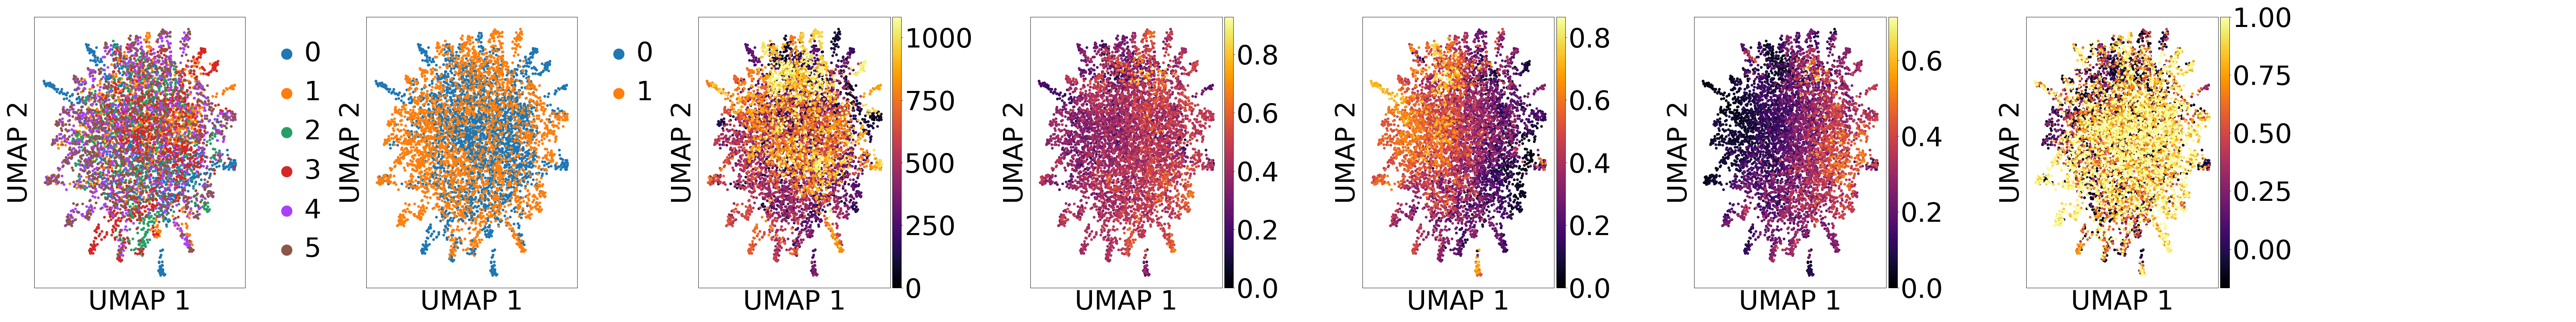

In [31]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from matplotlib.colorbar import Colorbar

import scanpy as sc 

sc.set_figure_params(vector_friendly=True, dpi_save=600)

# Determine the number of rows and columns based on the number of models
n_models = len(feature_keys)

# Create a figure with GridSpec layout
fig = plt.figure(figsize=(80,10*n_models))
gs = fig.add_gridspec(n_models, 8)

# Iterate over the models and plot the embeddings
for i, model_name in enumerate(feature_keys):
    print(model_name)
    embedding_key = "umap_" + model_name
    ax = fig.add_subplot(gs[i, 0])  # Determine the position based on the index
    _ = plot_embeddings_new(
        all_features_dict,
        embedding_key=embedding_key,
        annotation_keys=[model_name + '_classify_tissue_label'],
        ax=ax,  # Pass the axes object to the plotting function,
        s=150,
        legend_fontsize=legendfontsize 
    )
    # Change font sizes
    # ax.title.set_fontsize(titlefontsize)
    ax.set_title('')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.xaxis.label.set_fontsize(labelfontsize)
    ax.yaxis.label.set_fontsize(labelfontsize)
    ax.tick_params(axis='both', labelsize=tickfontsize)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legendfontsize, frameon=False, markerscale=legendmarkersize)

## Plot patch representation UMAPs colored by features of interest (condition)


# Iterate over the models and plot the embeddings
for i, model_name in enumerate(feature_keys):
    print(model_name)
    all_features_dict[model_name + '_classify_condition_cat'] = ['wild-type' if i == 0 else 'diabetes' for i in all_features_dict[model_name + '_classify_condition']]
    embedding_key = "umap_" + model_name
    ax = fig.add_subplot(gs[i, 1])  # Determine the position based on the index
    _ = plot_embeddings_new(
        all_features_dict,
        embedding_key=embedding_key,
        annotation_keys=[model_name + '_classify_condition'],
        ax=ax,  # Pass the axes object to the plotting function,
        s=150,
        legend_fontsize=legendfontsize
    )
    # Change font sizes
    # ax.title.set_fontsize(titlefontsize)
    ax.set_title('')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.xaxis.label.set_fontsize(labelfontsize)
    ax.yaxis.label.set_fontsize(labelfontsize)
    ax.tick_params(axis='both', labelsize=tickfontsize)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legendfontsize, frameon=False, markerscale=legendmarkersize)

## Plot patch representation UMAPs colored by features of interest
regress_keys = ['regress_loc_x', 'regress_ch_0', 'regress_ch_1', 'regress_ch_3', 'regress_moran_ch_0']
for i, model_name in enumerate(feature_keys):
    for k, regress_key in enumerate(regress_keys):
        embedding_key = "umap_" + model_name
        ax = fig.add_subplot(gs[i, k+2])  # Determine the position based on the index
        _ = plot_embeddings_new(
            all_features_dict,
            embedding_key=embedding_key,
            annotation_keys=[model_name + '_' + regress_key],
            ax=ax,
            s=150,
            legend_fontsize=legendfontsize
        )

        # Change font sizes
        # ax.title.set_fontsize(titlefontsize)
        ax.set_title('')
        ax.set_xlabel('UMAP 1')
        ax.set_ylabel('UMAP 2')
        ax.xaxis.label.set_fontsize(labelfontsize)
        ax.yaxis.label.set_fontsize(labelfontsize)
        ax.tick_params(axis='both', labelsize=tickfontsize)
        ax.legend(fontsize=legendfontsize, frameon=False, markerscale=legendmarkersize)
        ax.collections[-1].colorbar.ax.tick_params(labelsize=tickfontsize)
        

# Adjust the layout and save the figure
plt.tight_layout()
fig.savefig('Supp_Figure_2a.pdf', transparent=True, bbox_inches='tight', dpi=300)


## Plot UMAPs colored by features of interest for Supp Fig 2B

In [ ]:
# ## read in all features dict
# import pickle

all_features_dict = pickle.load(open('testis_all_features_dict_umap_dino_no_local.pickle', 'rb')) 

In [ ]:
feature_keys = ["dino"]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from matplotlib.colorbar import Colorbar

import scanpy as sc 

sc.set_figure_params(vector_friendly=True, dpi_save=600)

# Determine the number of rows and columns based on the number of models
n_models = len(feature_keys)

# Create a figure with GridSpec layout
fig = plt.figure(figsize=(80,10*n_models))
gs = fig.add_gridspec(n_models, 8)

# Iterate over the models and plot the embeddings
for i, model_name in enumerate(feature_keys):
    print(model_name)
    embedding_key = "umap_" + model_name
    ax = fig.add_subplot(gs[i, 0])  # Determine the position based on the index
    _ = plot_embeddings_new(
        all_features_dict,
        embedding_key=embedding_key,
        annotation_keys=[model_name + '_classify_tissue_label'],
        ax=ax,  # Pass the axes object to the plotting function,
        s=150,
        legend_fontsize=legendfontsize 
    )
    # Change font sizes
    # ax.title.set_fontsize(titlefontsize)
    ax.set_title('')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.xaxis.label.set_fontsize(labelfontsize)
    ax.yaxis.label.set_fontsize(labelfontsize)
    ax.tick_params(axis='both', labelsize=tickfontsize)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legendfontsize, frameon=False, markerscale=legendmarkersize)

## Plot patch representation UMAPs colored by features of interest (condition)


# Iterate over the models and plot the embeddings
for i, model_name in enumerate(feature_keys):
    print(model_name)
    all_features_dict[model_name + '_classify_condition_cat'] = ['wild-type' if i == 0 else 'diabetes' for i in all_features_dict[model_name + '_classify_condition']]
    embedding_key = "umap_" + model_name
    ax = fig.add_subplot(gs[i, 1])  # Determine the position based on the index
    _ = plot_embeddings_new(
        all_features_dict,
        embedding_key=embedding_key,
        annotation_keys=[model_name + '_classify_condition'],
        ax=ax,  # Pass the axes object to the plotting function,
        s=150,
        legend_fontsize=legendfontsize
    )
    # Change font sizes
    # ax.title.set_fontsize(titlefontsize)
    ax.set_title('')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.xaxis.label.set_fontsize(labelfontsize)
    ax.yaxis.label.set_fontsize(labelfontsize)
    ax.tick_params(axis='both', labelsize=tickfontsize)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legendfontsize, frameon=False, markerscale=legendmarkersize)

## Plot patch representation UMAPs colored by features of interest
regress_keys = ['regress_loc_x', 'regress_ch_0', 'regress_ch_1', 'regress_ch_3', 'regress_moran_ch_0']
for i, model_name in enumerate(feature_keys):
    for k, regress_key in enumerate(regress_keys):
        embedding_key = "umap_" + model_name
        ax = fig.add_subplot(gs[i, k+2])  # Determine the position based on the index
        _ = plot_embeddings_new(
            all_features_dict,
            embedding_key=embedding_key,
            annotation_keys=[model_name + '_' + regress_key],
            ax=ax,
            s=150,
            legend_fontsize=legendfontsize
        )

        # Change font sizes
        # ax.title.set_fontsize(titlefontsize)
        ax.set_title('')
        ax.set_xlabel('UMAP 1')
        ax.set_ylabel('UMAP 2')
        ax.xaxis.label.set_fontsize(labelfontsize)
        ax.yaxis.label.set_fontsize(labelfontsize)
        ax.tick_params(axis='both', labelsize=tickfontsize)
        ax.legend(fontsize=legendfontsize, frameon=False, markerscale=legendmarkersize)
        ax.collections[-1].colorbar.ax.tick_params(labelsize=tickfontsize)
        

# Adjust the layout and save the figure
plt.tight_layout()
fig.savefig('Supp_Figure_2b.pdf', transparent=True, bbox_inches='tight', dpi=300)
